In [3]:
#importing all the necessary packages

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

file_path = '/diabetes.csv'

dataframe = pd.read_csv(file_path)

In [4]:
#Checking the dataframe

dataframe.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#checking the summary stats 
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Checking the datatypes and other info from the dataframe

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#checking if there are any null values in any columns 

dataframe.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

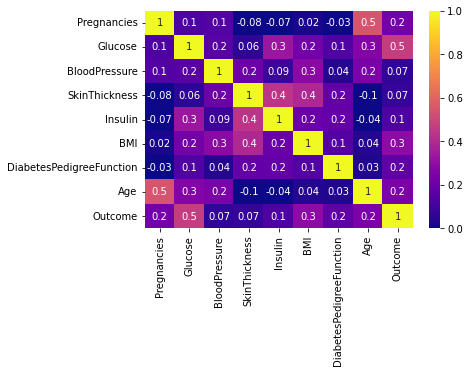

In [8]:
#visallu evaluting the correlations

sns.heatmap(dataframe.corr(), annot = True, fmt = '.1g', vmin = 0, vmax = 1, cmap = 'plasma')

# **Checking how each columns affects the disease**

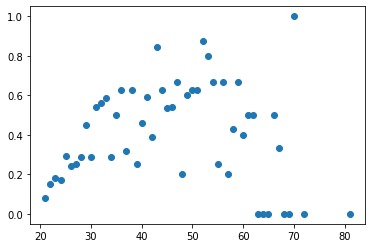

In [9]:


plt.scatter(dataframe.sort_values('Age')['Age'].unique(), dataframe.groupby('Age').mean()['Outcome'])

plt.show()

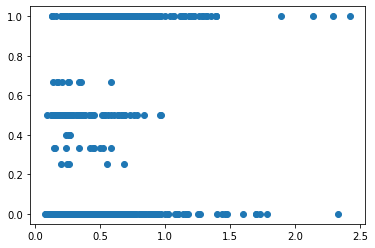

In [11]:
plt.scatter(dataframe.sort_values('DiabetesPedigreeFunction')['DiabetesPedigreeFunction'].unique(), dataframe.groupby('DiabetesPedigreeFunction').mean()['Outcome'])

plt.show()

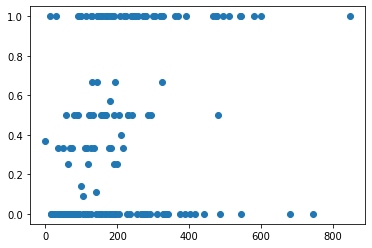

In [12]:
plt.scatter(dataframe.sort_values('Insulin')['Insulin'].unique(), dataframe.groupby('Insulin').mean()['Outcome'])

plt.show()

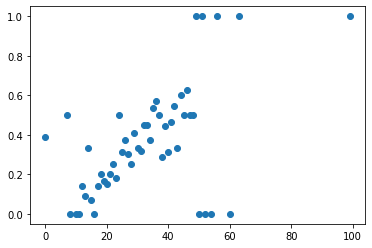

In [13]:
plt.scatter(dataframe.sort_values('SkinThickness')['SkinThickness'].unique(), dataframe.groupby('SkinThickness').mean()['Outcome'])

plt.show()

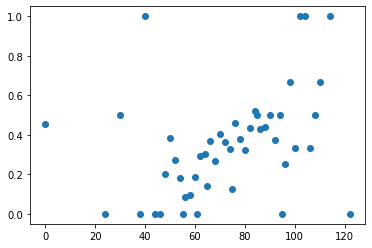

In [14]:
plt.scatter(dataframe.sort_values('BloodPressure')['BloodPressure'].unique(), dataframe.groupby('BloodPressure').mean()['Outcome'])

plt.show()

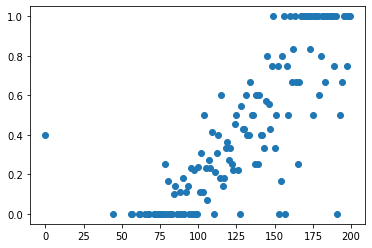

In [15]:


plt.scatter(dataframe.sort_values('Glucose')['Glucose'].unique(), dataframe.groupby('Glucose').mean()['Outcome'])

plt.show()

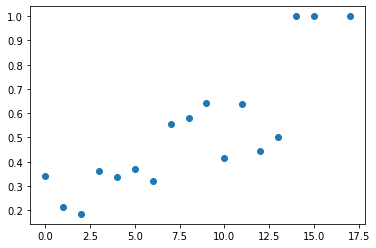

In [16]:
plt.scatter(dataframe.sort_values('Pregnancies')['Pregnancies'].unique(), dataframe.groupby('Pregnancies').mean()['Outcome'])

plt.show()

#### It is obvious from the above charts that Insulin, BMI and DiabetesPedigreeFunction do not correlate with the disease

# Predicting the Data

In [19]:
y = dataframe['Outcome'].values

X = dataframe.drop(['Outcome','Insulin','BMI','DiabetesPedigreeFunction'],axis=1).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

result = {}

In [23]:
#LR
reg = LogisticRegression()

reg.fit(X_train, y_train)

result['Logistic Regression'] = reg.score(X_test,y_test)

In [24]:
#RandomForest

RF = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)

RF.fit(X_train, y_train)

result['RandomForestClassifier'] = RF.score(X_test,y_test)

In [25]:
#MLPC

NN = MLPClassifier(hidden_layer_sizes=(18,), random_state=1, max_iter=1000)

NN.fit(X_train, y_train)

result['MLPClassifier'] = NN.score(X_test,y_test)

In [26]:
#GaussianNB

GNB = GaussianNB()

GNB.fit(X_train, y_train)

result['GaussianNB'] = GNB.score(X_test,y_test)

In [27]:
#DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

result['DecisionTreeClassifier'] = DTC.score(X_test,y_test)

In [28]:
from tabulate import tabulate

result = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))

print(tabulate(result.items(), headers=[' CLASSIFIER NAME', 'VALUE'], tablefmt="grid"))

+------------------------+----------+
|  CLASSIFIER NAME       |    VALUE |
+========================+==========+
| MLPClassifier          | 0.753247 |
+------------------------+----------+
| RandomForestClassifier | 0.744589 |
+------------------------+----------+
| GaussianNB             | 0.735931 |
+------------------------+----------+
| Logistic Regression    | 0.731602 |
+------------------------+----------+
| DecisionTreeClassifier | 0.679654 |
+------------------------+----------+
